In [619]:
#installing mysql and python connector 
! pip install mysql-connector-python

In [620]:
#importing mysql connector
import mysql.connector
from mysql.connector import Error

In [621]:
#making connection with mysql
try:
    connection = mysql.connector.connect(host='localhost',
                                         database='techblog',
                                         user='root',
                                         password='*******')
except:
    print("Error while connecting to MySQL", e)

In [622]:
try:
    if connection.is_connected():
        cursor = connection.cursor()
        #running mysql query to fetch title of the articles
        cursor.execute("select title from articles where status = 1 and language = 'English';")
        title_rows = cursor.fetchall()
except Error as e:
    print("Error while connecting to MySQL", e)

In [653]:
#finding the length of titles
length_title_list = [len(row[0]) for row in title_rows]

# length_title_list = []
# for row in title_rows:
#     title = row[0]
#     #print(title)
#     length_title = len(title)
#     length_title_list.append(length_title)

In [656]:
import statistics

minimum = min(length_title_list)
maximum = max(length_title_list)
print(minimum)
print(maximum)

median = statistics.median(length_title_list)
print(median)

sorted = np.sort(length_title_list)
percentiles = np.percentile(length_title_list, [25,50,75])
print(percentiles)

3
125
35
[24. 35. 51.]


In [624]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams


In [625]:
#setting the figure parameters
%matplotlib inline
rcParams['figure.figsize'] = (10,8)

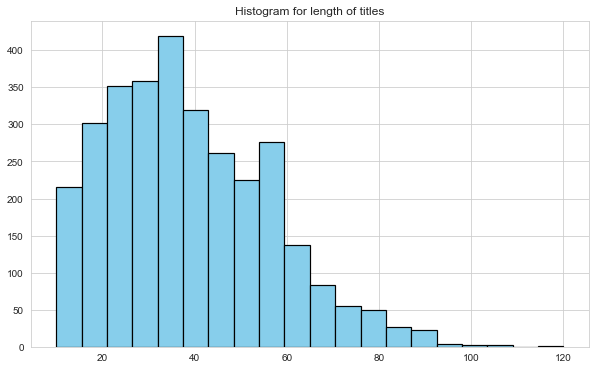

In [626]:
#plotting the histogram of length of titles
fig = plt.figure(figsize = (10,6))
plt.hist(length_title_list, bins = 20, range = [10,120], color = "skyblue", edgecolor = 'black', linewidth = 1.2)
plt.title("Histogram for length of titles")
fig.savefig('hist_length_title.png', bbox_inches = "tight")
plt.show()

It can be interpreted from the histogram that the length of title ranges between 2 and 120. Most of the articles have length less than 60 characters. Let us plot a boxplot to know more about the distribution of the title length.

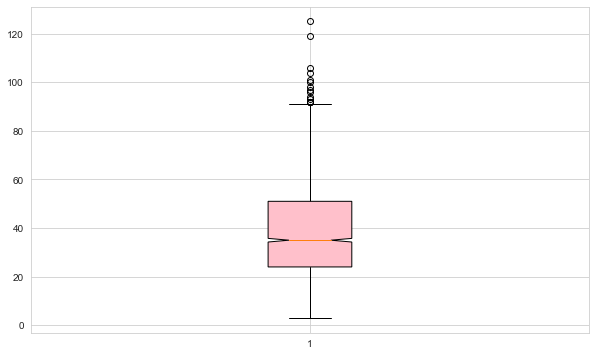

In [627]:
#creating the boxplot of length of titles
fig1 = plt.figure(figsize = (10,6))
box = plt.boxplot(length_title_list, patch_artist = True, notch = True)
box['boxes'][0].set_facecolor('pink')
fig1.savefig('boxplot_length_title.png', bbox_inches = "tight")
plt.show()

It can be interpreted from the boxplot that the minimum length of title is 3 characters and the maximum length of title is 125 characters. Also, the median length of title is 35 characters, which clearly indicates that maximum articles have length close to 35 characters. The interquantile range of the length of articles is 24 and 51, which indicates that 50% of the articles have length of title between 24 and 51. There are a few outliers as well which lies above the title length of 75 characters.

In [628]:
try:
    if connection.is_connected():
        cursor = connection.cursor()
        #fetching the category, title, body and number of views from articles table
        cursor.execute("select category, title, body, views from articles where status = 1 and language = 'English';")
        article_rows = cursor.fetchall()
except Error as e:
    print("Error while connecting to MySQL", e)

In [629]:
from bs4 import BeautifulSoup

In [630]:
def extract_content_from_html(html_body):
    #extracting text from html content
    html_content = BeautifulSoup(html_body, 'lxml')
    return html_content.get_text()

In [632]:
#every article tuple will contain 4 things: category, title length, body length and total number of views
def article_tuple_to_list(article_tuple):
    article_tuple_list = []
    if type(article_tuple) != tuple:
        raise ValueError('article_tuple should be a tuple')
    elif len(article_tuple) != 4:
        raise ValueError('article_tuple should be of length 4')
    else:
        article_tuple_list.append(article_tuple[0])
        article_tuple_list.append(len(article_tuple[1]))
        article_tuple_list.append(len(extract_content_from_html(article_tuple[2])))
        article_tuple_list.append(article_tuple[3])
    return article_tuple_list

In [633]:
article_list_of_list = []
for row in article_rows:
    #creating list of list for articles using the article_tuple_to_list function
    article_list_of_list.append(article_tuple_to_list(row))
#print(article_list_of_list)

In [634]:
#creating data frame with the elements of above created list
df_articles = pd.DataFrame.from_records(article_list_of_list)
df_articles.columns = "Category", "Title_Length", "Body_Length", "Views"
df_articles.head()

,Category,Title_Length,Body_Length,Views
0,tutorials,52,1106,152
1,tech,12,2075,324
2,tech,17,1306,92
3,tech,10,601,88
4,tech,13,2175,66


In [635]:
df_articles.describe()

,Title_Length,Body_Length,Views
count,3201.000000,3201.000000,3201.000000
mean,37.794752,2649.105592,121.779444
std,18.240615,1461.564208,340.310895
min,3.000000,137.000000,0.000000
25%,24.000000,1948.000000,14.000000
50%,35.000000,2270.000000,38.000000
75%,51.000000,3066.000000,116.000000
max,125.000000,13574.000000,8068.000000


In [636]:
#importing required library
import seaborn as sb
sb.set_style('whitegrid')

<Figure size 720x432 with 0 Axes>

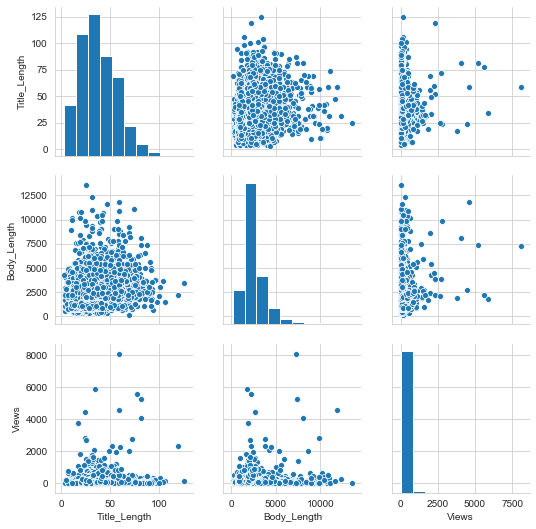

In [671]:
#creating a matrix plot uding the data frame
sb.pairplot(df_articles)

It can be interpreted from the matrix plot that there does not exist any obvious relationship in between any two columns of the dataframe. Let us create anothe dataframe using this dataframe. The new dataframe will store the average title length, average body length and average number of views per category.

In [657]:
number_of_views_dict = {}

# print(article_list_of_list)

for article_row in article_list_of_list:
    category = article_row[0]
    title_len = article_row[1]
    body_len = article_row[2]
    views = article_row[3]
    
    #this dictionary 
    
    ###
    # After below code number_of_views_dict will be like below format
    # number_of_views_dict = 
    # {
    #     "category1" : [sum of all title len, sum of all body len, total views, total number of articles],
    #     "category2" : [sum of all title len, sum of all body len, total views, total number of articles]
    # }
    ###
    if category not in number_of_views_dict:
        #number_of_views_dict[category] = [title_len,body_len,views,category_occurences]
        number_of_views_dict[category] = [0,0,0,0]
        
    number_of_views_dict[category][0] += title_len
    number_of_views_dict[category][1] += body_len
    number_of_views_dict[category][2] += views
    number_of_views_dict[category][3] += 1

###
# After below code number_of_views_dict will be like below format
# number_of_views_dict = 
# {
#     "category1" : [average title len, average body len, average views, total number of articles],
#     "category2" : [average title len, average body len, average views, total number of articles]
# }
###
    
for category_key in number_of_views_dict:
    
    total_title_len = number_of_views_dict[category_key][0]
    total_body_len = number_of_views_dict[category_key][1]
    total_views = number_of_views_dict[category_key][2]
    occurence = number_of_views_dict[category_key][3]
    
    number_of_views_dict[category_key][0] = total_title_len//occurence
    number_of_views_dict[category_key][1] = total_body_len//occurence
    number_of_views_dict[category_key][2] = total_views//occurence

In [639]:
list_article = []
for category in number_of_views_dict:
    #inserting category at the 0th index in the list
    number_of_views_dict[category].insert(0,category)
    list_article.append(number_of_views_dict[category])
#print(list_article)

In [640]:
#creating a dataframe from the above list
df_articles_count = pd.DataFrame.from_records(list_article)
df_articles_count.columns = ["Category", "Avg Title Len", "Avg Body Len", "Avg Views","No of items"]
df_articles_count.head()

,Category,Avg Title Len,Avg Body Len,Avg Views,No of items
0,tutorials,39,2854,124,47
1,tech,39,2521,110,519
2,travel,34,3127,83,106
3,thoughts,33,2798,77,571
4,education,39,3578,344,178


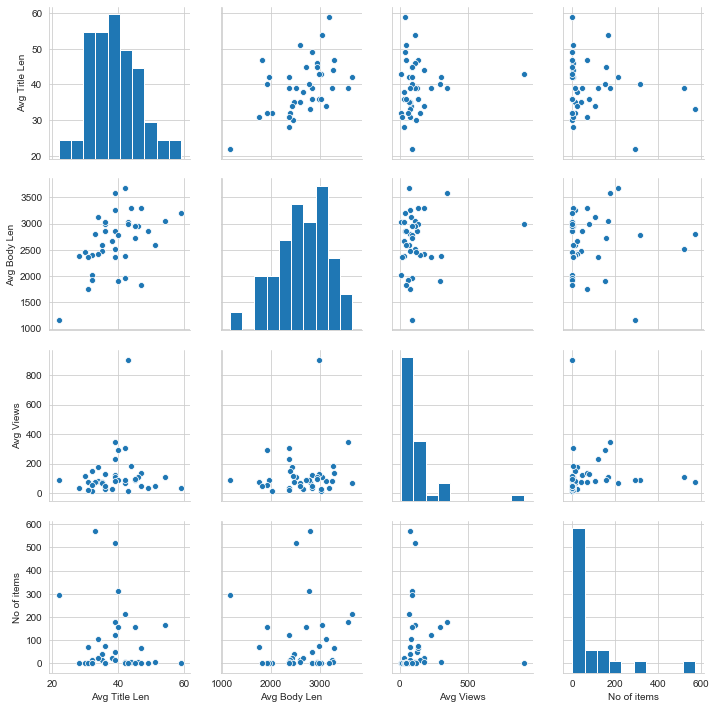

In [641]:
#plotting a matrix plot using the above dataframe
sb.pairplot(df_articles_count)

It can be interpreted from the matrix plot that there does not exist any obvious relationship in between the columns of the dataframe and hence, nothing can be concluded form this matrix plot.

In [658]:
category_10_list = []
userid_10_list = []
userid_category_list = []

#writing SQL queries to fetch article count as per user id and category for top 10 users and categories
try:
    if connection.is_connected():
        # First sql query
        cursor = connection.cursor()
        cursor.execute("select category, count(*) as 'Count per category' from articles group by category order by count(*) DESC limit 10;")
        category_10_list = cursor.fetchall()
        # Second sql query
        cursor = connection.cursor()
        cursor.execute("select userid, count(*) as 'Count per user' from articles group by userid order by count(*) DESC limit 10;")
        userid_10_list = cursor.fetchall()
        # Third sql query
        cursor = connection.cursor()
        cursor.execute("select userid, category, count(*) as 'Count per user and category' from articles group by userid, category order by userid;")
        userid_category_list = cursor.fetchall()
except Error as e:
    print("Error while connecting to MySQL", e)
  
category_10_list = [category_tuple[0] for category_tuple in category_10_list] 

userid_10_list = [user_tuple[0] for user_tuple in userid_10_list]

userid_category_list = [user_category_tuple for user_category_tuple in userid_category_list if user_category_tuple[0] in userid_10_list and user_category_tuple[1] in category_10_list]
print(userid_category_list)

[(2, 'education', 1), (2, 'news', 2), (2, 'tech', 213), (2, 'thoughts', 4), (2, 'topxx', 1), (14, 'finance', 54), (1356, 'entertainment', 10), (1356, 'fiction', 3), (1356, 'health', 2), (1356, 'news', 2), (1356, 'poem', 1), (1356, 'thoughts', 16), (1356, 'topxx', 2), (1796, 'education', 3), (1796, 'finance', 42), (1796, 'health', 47), (1796, 'news', 1), (1796, 'tech', 69), (1796, 'thoughts', 23), (1796, 'topxx', 45), (2928, 'education', 1), (2928, 'entertainment', 5), (2928, 'finance', 1), (2928, 'news', 33), (2928, 'tech', 5), (2928, 'thoughts', 1), (2994, 'fiction', 104), (2994, 'thoughts', 43), (2994, 'topxx', 1), (3187, 'education', 5), (3187, 'entertainment', 4), (3187, 'fiction', 2), (3187, 'finance', 2), (3187, 'health', 22), (3187, 'tech', 4), (3187, 'thoughts', 3), (3187, 'topxx', 3), (3425, 'entertainment', 9), (3425, 'finance', 5), (3425, 'health', 36), (3425, 'news', 17), (3425, 'tech', 21), (3425, 'thoughts', 4), (3425, 'topxx', 2), (3429, 'fiction', 6), (3429, 'poem', 90)

In [643]:
category_dict = {
 'thoughts':0,
 'tech':1,
 'poem':2,
 'health':3,
 'fiction':4,
 'entertainment':5,
 'news':6,
 'education':7,
 'finance':8,
 'topxx':9}

In [644]:
user_dict = {
    1796: [0,0,0,0,0,0,0,0,0,0], 
    2 : [0,0,0,0,0,0,0,0,0,0], 
    2994 : [0,0,0,0,0,0,0,0,0,0], 
    3187 : [0,0,0,0,0,0,0,0,0,0], 
    3429 : [0,0,0,0,0,0,0,0,0,0], 
    3425 : [0,0,0,0,0,0,0,0,0,0], 
    4642 : [0,0,0,0,0,0,0,0,0,0], 
    14 : [0,0,0,0,0,0,0,0,0,0], 
    2928 : [0,0,0,0,0,0,0,0,0,0], 
    1356 : [0,0,0,0,0,0,0,0,0,0]
}

In [645]:
#creating a dictionary to store article count as per category for top 10 user ids
for userid, category, count in userid_category_list:
    index = category_dict[category]
    user_dict[userid][index] = count
user_dict

{1796: [23, 69, 0, 47, 0, 0, 1, 3, 42, 45],
 2: [4, 213, 0, 0, 0, 0, 2, 1, 0, 1],
 2994: [43, 0, 0, 0, 104, 0, 0, 0, 0, 1],
 3187: [3, 4, 0, 22, 2, 4, 0, 5, 2, 3],
 3429: [16, 0, 90, 0, 6, 0, 0, 0, 0, 2],
 3425: [4, 21, 0, 36, 0, 9, 17, 0, 5, 2],
 4642: [2, 32, 0, 44, 0, 2, 2, 1, 1, 0],
 14: [0, 0, 0, 0, 0, 0, 0, 0, 54, 0],
 2928: [1, 5, 0, 0, 0, 5, 33, 1, 1, 0],
 1356: [16, 0, 1, 2, 3, 10, 2, 0, 0, 2]}

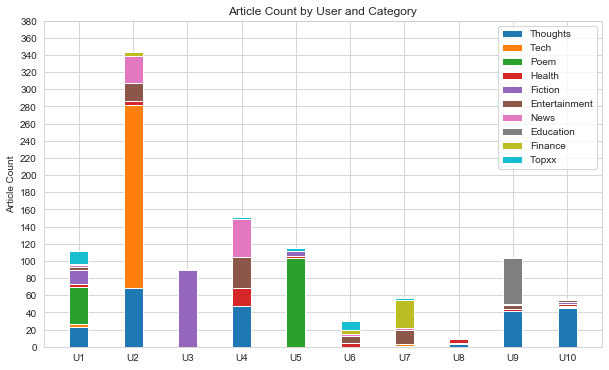

In [672]:
# user count = 10 and category count = 10

fig2 = plt.figure(figsize = (10,6))

N = 10

u1 = [23, 69, 0, 47, 0, 0, 1, 3, 42, 45]
u2 = [4, 213, 0, 0, 0, 0, 2, 1, 0, 1]
u3 = [43, 0, 0, 0, 104, 0, 0, 0, 0, 1]
u4 = [3, 4, 0, 22, 2, 4, 0, 5, 2, 3]
u5 = [16, 0, 90, 0, 6, 0, 0, 0, 0, 2]
u6 = [4, 21, 0, 36, 0, 9, 17, 0, 5, 2]
u7 = [2, 32, 0, 44, 0, 2, 2, 1, 1, 0]
u8 = [0, 0, 0, 0, 0, 0, 0, 0, 54, 0]
u9 = [1, 5, 0, 0, 0, 5, 33, 1, 1, 0]
u10 = [16, 0, 1, 2, 3, 10, 2, 0, 0, 2]

ind = np.arange(N)  
width = 0.35       # the width of the bars

#plotting stacked bars for each user as per article count in each category
p1 = plt.bar(ind, u1, width)
p2 = plt.bar(ind, u2, width, bottom=u1) 

u12 = list(map(sum,zip(u1,u2)))
p3 = plt.bar(ind, u3, width, bottom=u12)

u23 = list(map(sum,zip(u12,u3)))
p4 = plt.bar(ind, u4, width, bottom=u23)

u34 = list(map(sum,zip(u23,u4)))
p5 = plt.bar(ind, u5, width, bottom=u34)

u45 = list(map(sum,zip(u34,u5)))
p6 = plt.bar(ind, u6, width, bottom=u45)

u56 = list(map(sum,zip(u45,u6)))
p7 = plt.bar(ind, u7, width, bottom=u56)

u67 = list(map(sum,zip(u56,u7)))
p8 = plt.bar(ind, u8, width, bottom=u67)

u78 = list(map(sum,zip(u67,u8)))
p9 = plt.bar(ind, u9, width, bottom=u78)

u89 = list(map(sum,zip(u78,u9)))
p10 = plt.bar(ind, u10, width, bottom=u89)

plt.ylabel('Article Count')
plt.title('Article Count by User and Category')
plt.xticks(ind, ('U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10'))
plt.yticks(np.arange(0, 400, 20))
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0],p10[0]), ('Thoughts','Tech','Poem','Health','Fiction','Entertainment','News','Education','Finance','Topxx'))

fig2.savefig('stack_user_category.png', bbox_inches = "tight")
plt.show()

It can be interpreted from the stacked bar chart that not all categories are popular among all the authors. Authors have their own preference while choosing a category for writing any article. For instance, User 1 prefers writing articles in poems and thoughts category more than any other category. User 2 has a strong inclination towards tech articles. Though this user has written a lot of articles in thoughts catgeory too but tech is no doubt an outlier. Also, this user has written the maximum number of articles in oyewiki. User 3 only writes fiction articles whereas User 4 likes to write articles in thoughts, health, entertainment and news categories. User 5 again has a preference of writing articles in the category poem. User 6 abd 8 has no such preference and write articles in almost every category. User 7 writes more in finance followed by entertainment. User 9 prefers writing in thoughts and education whereas User 10 prefers thoughts category more than any other category.